In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [2]:
df = pd.read_csv('cleaned_derived_data.csv')
df

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release,Developer_clas,Derived_global_sales
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,...,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0,1,1
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,...,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0,1,1
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,...,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0,1,1
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,...,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0,1,1
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,...,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,...,81.0,12.0,8.8,9.0,Criterion Games,M,1,14.0,0,0
7009,16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,...,80.0,20.0,7.6,412.0,Kojima Productions,M,0,2.0,0,0
7010,16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,...,61.0,12.0,5.8,43.0,Atomic Games,T,0,5.0,0,0
7011,16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,...,60.0,12.0,7.2,13.0,SimBin,E10+,0,5.0,0,0


In [3]:
df.dropna(subset=['years_since_release'], inplace=True)

# Print the resulting dataframe
df

,Unnamed: 0,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,...,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,New_User_Score,years_since_release,Developer_clas,Derived_global_sales
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,...,76.0,51.0,8.0,322.0,Nintendo,E,1,10.0,1,1
1,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,...,82.0,73.0,8.3,709.0,Nintendo,E,1,8.0,1,1
2,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,...,80.0,73.0,8.0,192.0,Nintendo,E,1,7.0,1,1
3,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,...,89.0,65.0,8.5,431.0,Nintendo,E,1,10.0,1,1
4,7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,...,58.0,41.0,6.6,129.0,Nintendo,E,0,10.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,...,81.0,12.0,8.8,9.0,Criterion Games,M,1,14.0,0,0
7009,16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,...,80.0,20.0,7.6,412.0,Kojima Productions,M,0,2.0,0,0
7010,16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,...,61.0,12.0,5.8,43.0,Atomic Games,T,0,5.0,0,0
7011,16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,...,60.0,12.0,7.2,13.0,SimBin,E10+,0,5.0,0,0


# Taking Global Sales as Response Variable

In [4]:
# Split the data into features (X) and target (y)
x1 = df['User_Score']
x2 = df['years_since_release']
x3 = df['Developer_clas']
x4 = df['Critic_Score']
X = pd.concat([x1, x2, x3, x4], axis = 1).reindex(x1.index) 
y = df['Derived_global_sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
y_pred = rf.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6647314949201741


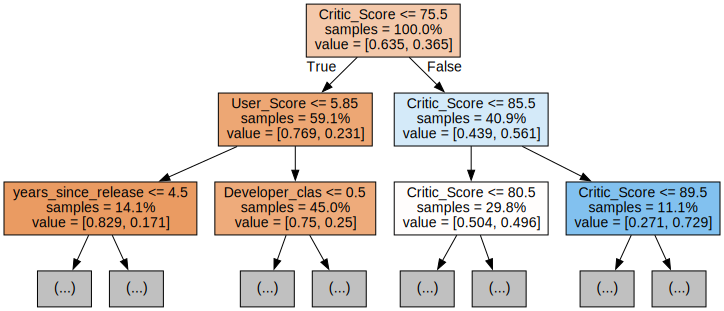

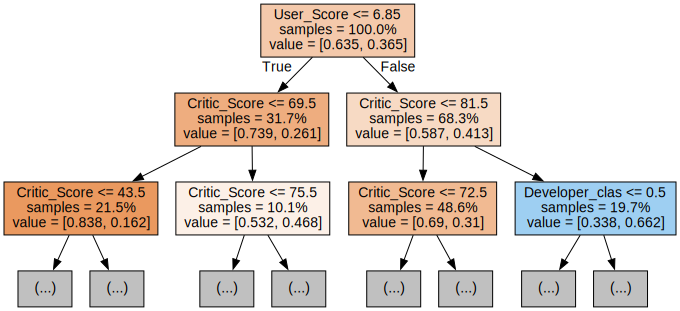

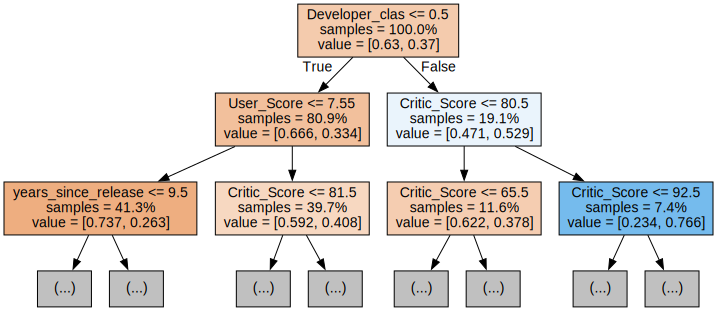

In [8]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

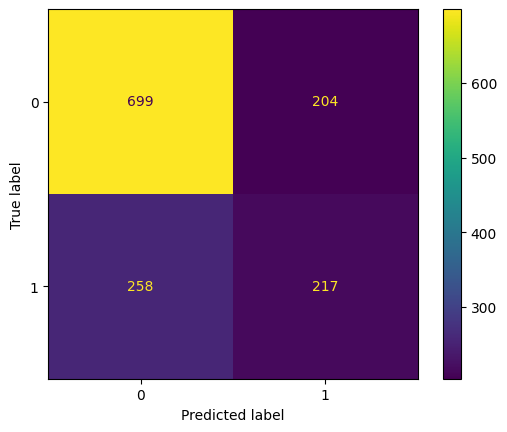

In [9]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Results are here

In [10]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.6647314949201741
Precision: 0.5154394299287411
Recall: 0.4568421052631579


Accuracy: Accuracy is the proportion of correct predictions made by the classifier out of all the predictions made. It is calculated as the ratio of the number of correctly classified instances to the total number of instances.

Precision: Precision is the proportion of true positives (correctly predicted positive instances) out of all the instances predicted as positive (true positives plus false positives). It is a measure of the classifier's ability to avoid false positives.

Recall: Recall is the proportion of true positives (correctly predicted positive instances) out of all the actual positive instances (true positives plus false negatives). It is a measure of the classifier's ability to find all the positive instances.

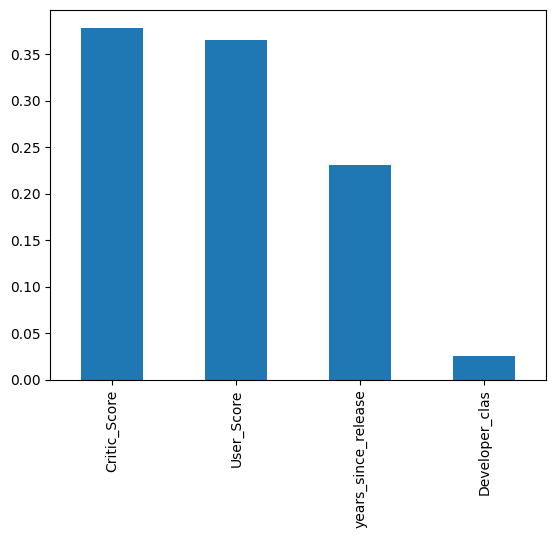

In [11]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

# Taking User_Score as Response Variable

In [12]:
# Split the data into features (X) and target (y)
x1 = df['Global_Sales']
x2 = df['years_since_release']
x3 = df['Developer_clas']
x4 = df['Critic_Score']
X = pd.concat([x1, x2, x3, x4], axis = 1).reindex(x1.index) 
y = df['New_User_Score']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.704644412191582


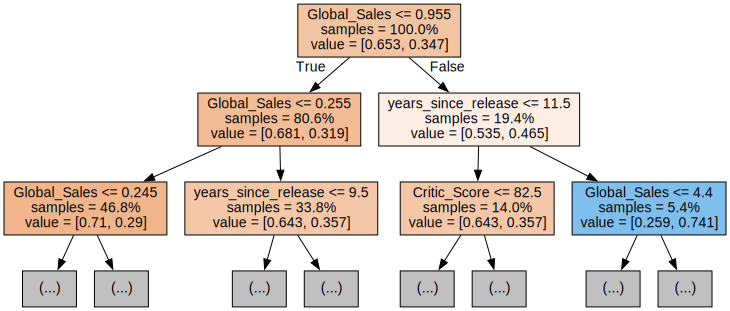

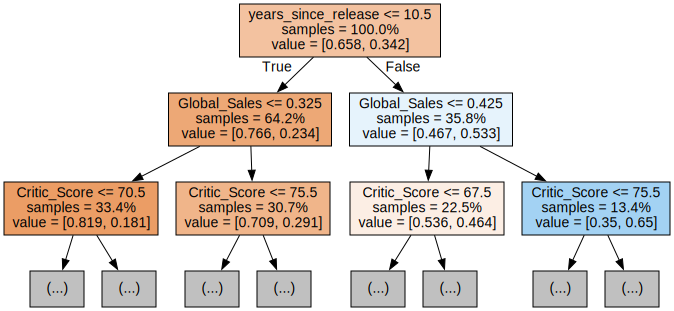

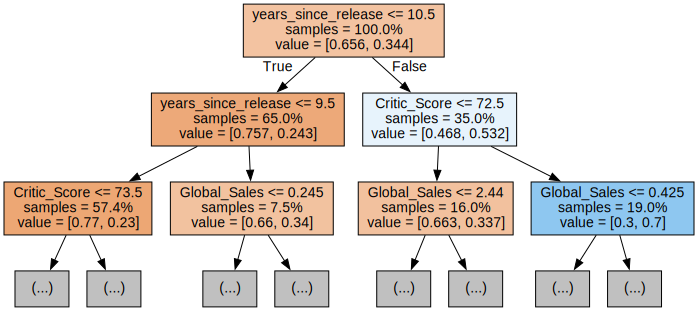

In [13]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

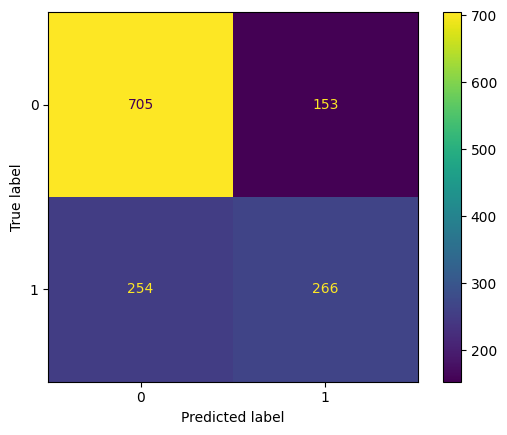

In [14]:
# Generate predictions with the best model
y_pred = rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# Results

In [15]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.704644412191582
Precision: 0.6348448687350835
Recall: 0.5115384615384615


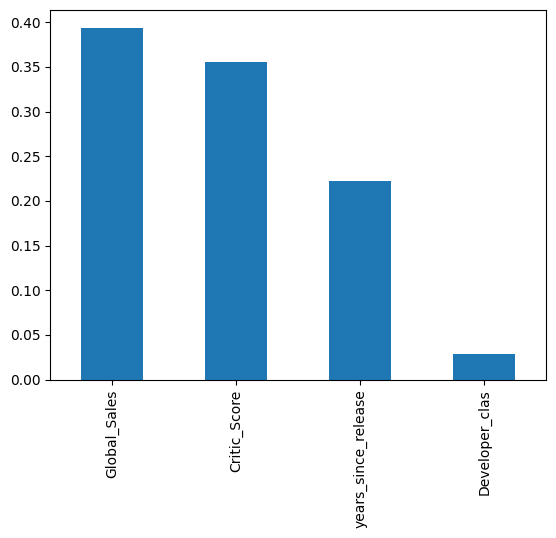

In [16]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();